# Linear Regression using Numpy
**Here we show one example of Linear Regression using NumPy. Importance of feature scaling and surfaces of loss function for different types of data organizations**

# Imports

In [1]:
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
%config InlineBackend.figure_format ='retina'

# Read Dataset

In [2]:
data = pd.read_csv('../../data/machine-learning-introduction/advertising.csv', index_col=0)

In [3]:
data.head()

TV  Radio  Newspaper  Sales
1  230.1   37.8       69.2   22.1
2   44.5   39.3       45.1   10.4
3   17.2   45.9       69.3    9.3
4  151.5   41.3       58.5   18.5
5  180.8   10.8       58.4   12.9

In [4]:
data.shape

(200, 4)

# Preprocess Data

- **y**: target which we are going to model/estimate/predict
- **X**: input features from data which is an input to our model

## Show Boxplots to better understand features distribution

<img src="../../resources/machine-learning-introduction/boxplot.png" style="height: 256px;">

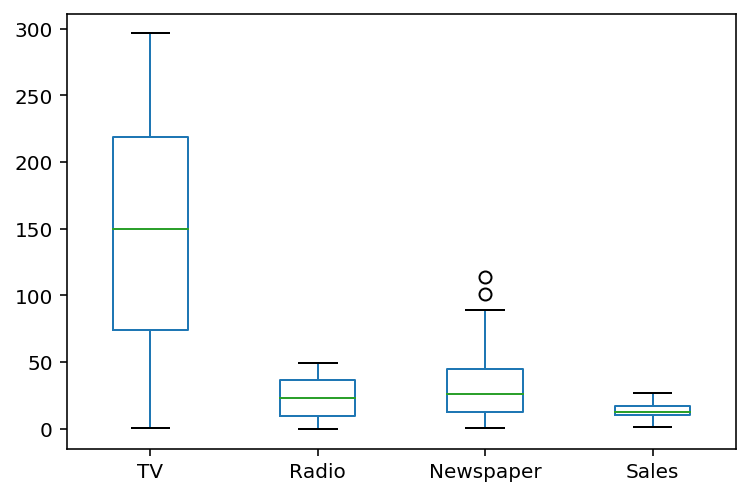

In [5]:
data.plot(kind='box');

## Show Histograms for each feature

here we see that **Newspaper** and **TV** have high range of distribution, But **Radio** and **Sales** have low. We need to take two feature for convenience and since we are going to see some effects of feature scaling we will take two such feature which have different range. In that case we will choose **TV** and **Radio**.

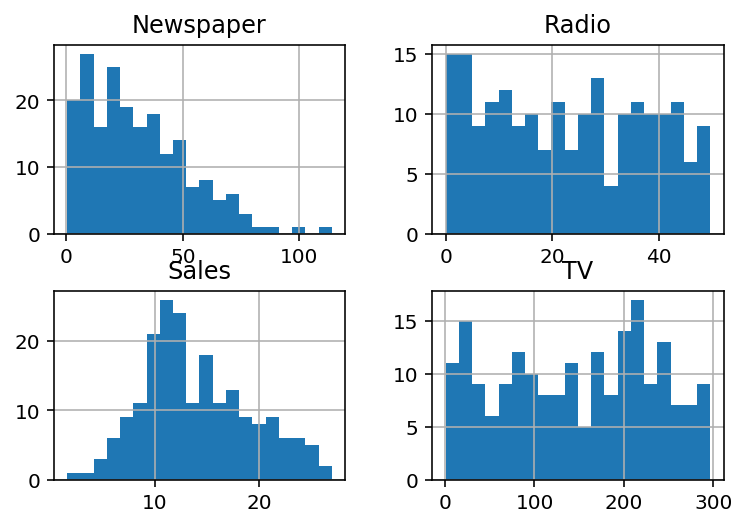

In [6]:
data.hist(bins=20);

## Split into features and target

In [7]:
y = data['Sales'].values
X = data[['TV', 'Radio']].values

## Scale Features

There are many techniques of scaling. We will just scale features to have (0,1) range of distribution

You can check several feature scaling techniques [here](https://sebastianraschka.com/Articles/2014_about_feature_scaling.html)

## Define Functions

In [8]:
def scale(features):
    feat_min, feat_max = features.min(), features.max()
    return (features - feat_min) /  (feat_max-feat_min)

## Create scaled features

In [9]:
X_scaled = X.copy()
X_scaled[:,0] = scale(X_scaled[:,0])
X_scaled[:,1] = scale(X_scaled[:,1])

# Normal Equation

Here we will find the best parameters using normal equation

$${\boldsymbol{\theta}}= (\mathbf X^{\rm T} \mathbf X )^{-1} \mathbf X^{\rm T} \mathbf y$$

In [10]:
def normalEquation(X, y):
    theta = []
    
    # add 1's to X for theta_0 (bias term)
    X = np.hstack((np.ones((X.shape[0],1)), X))
    
    # create x transpose for convenience
    X_transpose = np.transpose(X)
    
    # calculate optimal theta
    theta = np.linalg.inv(X_transpose.dot(X))
    theta = theta.dot(X_transpose)
    theta = theta.dot(y)

    return theta

## For original Data

In [11]:
w0_optimal_orig, w1_optimal_orig = normalEquation(X, y)[1:3]
w0_optimal_orig, w1_optimal_orig

(0.04575481510107613, 0.18799422662030896)

## For scaled Data

In [12]:
w0_optimal_scaled, w1_optimal_scaled = normalEquation(X_scaled, y)[1:3]
w0_optimal_scaled, w1_optimal_scaled

(13.529698825388273, 9.324513640367343)

# Gradient Descent

We will use full batch gradient descent here only. Our goal is to plot loss surface contours and check how we approach optimum using gradient descent

We use just **mse_loss** only for simplicity

You can check different loss functions for regression [here](https://heartbeat.fritz.ai/5-regression-loss-functions-all-machine-learners-should-know-4fb140e9d4b0)

## Define functions for model prediction, gradient and loss calculations

In [13]:
def gradient_and_loss(W, x, y):
    y_hat = x.dot(W).flatten()
    error = (y - y_hat)
    mse = (1.0 / len(x)) * np.sum(np.square(error))
    gradient = -(1.0 / len(x)) * error.dot(x)
    return gradient, mse

In [14]:
def gradient_descent(X, y, w, n_th_loss=10, iters=200, lr=1e-3, tol=1e-5):
    ws = []
    losses = []

    for i in range(iters):
        gradient, loss = gradient_and_loss(w, X, y)
        
        # update weights
        new_w = w - lr * gradient

        # Print error every 10 iters
        if i % n_th_loss == 0:
            print(f"Iteration: {i} - Loss: {loss}")
            ws.append(new_w)
            losses.append(loss)

        # Stopping Condition
        if np.sum(abs(new_w - w)) < tol:
            print('Gradient Descent has converged')
            break
            
        w = new_w

    return losses, ws, w

## Run Gradient Descent on original (without normalization) features

In [15]:
w_init = np.array((-0.01, -4)) 
learning_rate = .00003
tolerance = 1e-5
losses_1, Ws_1, W_1 = gradient_descent(X, y, w_init, iters=500,  lr=learning_rate, tol=tolerance)

Iteration: 0 - Loss: 15687.731835194998
Iteration: 10 - Loss: 4823.635664608552
Iteration: 20 - Loss: 3942.318397181956
Iteration: 30 - Loss: 3222.1644277153623
Iteration: 40 - Loss: 2633.7024073888556
Iteration: 50 - Loss: 2152.850306242702
Iteration: 60 - Loss: 1759.92988794896
Iteration: 70 - Loss: 1438.8614040135988
Iteration: 80 - Loss: 1176.5055513343257
Iteration: 90 - Loss: 962.1257635974333
Iteration: 100 - Loss: 786.9488315001764
Iteration: 110 - Loss: 643.8058707623438
Iteration: 120 - Loss: 526.8389450177092
Iteration: 130 - Loss: 431.26133751517744
Iteration: 140 - Loss: 353.1616610660247
Iteration: 150 - Loss: 289.3437896958845
Iteration: 160 - Loss: 237.1960614160198
Iteration: 170 - Loss: 194.58439941027362
Iteration: 180 - Loss: 159.76497776361586
Iteration: 190 - Loss: 131.31285769272415
Iteration: 200 - Loss: 108.06367381071271
Iteration: 210 - Loss: 89.06598401350948
Iteration: 220 - Loss: 73.54233296999871
Iteration: 230 - Loss: 60.8574357907549
Iteration: 240 - Lo

### Loss change over iteratiosn

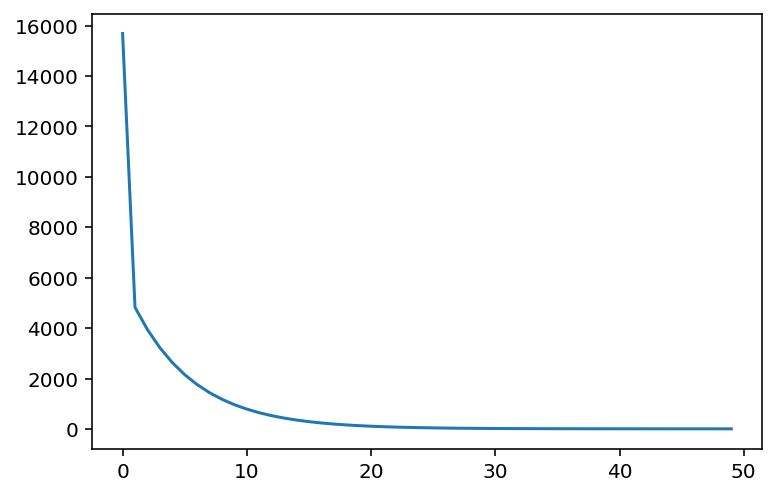

In [16]:
plt.plot(range(len(losses_1)), losses_1);

### Compare parameters to optimum

In [17]:
W_1, (w0_optimal_orig, w1_optimal_orig)

(array([0.05810879, 0.20888084]), (0.04575481510107613, 0.18799422662030896))

### Create Loss Surface Grid on weights

In [18]:
def create_loss_surface_grid(X, y, ws, losses, w_ranges, cells=100):
    # Use loss values as levels for loss surface contours
    levels = np.sort(np.array(losses))

    # Create Grid From Weight Values
    w0 = np.linspace(w_ranges[0][0], w_ranges[0][1], cells)
    w1 = np.linspace(w_ranges[1][0], w_ranges[1][1], cells, cells)

    # Create matrix of grid loss values
    mse_grid = np.zeros(shape=(w0.size, w1.size))

    # Calculate loss values in grid cells
    for w0_idx, w0_value in enumerate(w0):
        for w1_idx, w1_value in enumerate(w1):
            w_init_temp = np.array((w0_value, w1_value))
            _, loss_value = gradient_and_loss(w_init_temp, X, y)
            mse_grid[w0_idx, w1_idx] = loss_value
    
    return mse_grid, w0, w1, levels

In [19]:
loss_surface_grid_1, w0s_1, w1s_1, levels_1 = create_loss_surface_grid(X, y, Ws_1, losses_1, w_ranges=((-1,1), (-1,1)))

### Now plot loss surface

In [20]:
def plot_contours(w0, w1, ws, mse_grid, levels, alpha=0.7, figsize=(12,7)):
    plt.figure(figsize=figsize)
    plt.contourf(w0, w1, mse_grid, levels, alpha=alpha)
    plt.colorbar()
    
    plt.axhline(0, color='black', alpha=0.5, dashes=[2, 4],linewidth=1)
    plt.axvline(0, color='black', alpha=0.5, dashes=[2, 4],linewidth=1)
    
    for i in range(len(ws) - 1):
        plt.annotate('', xy=ws[i+1], xytext=ws[i],
                     arrowprops={'arrowstyle': '->', 'color': 'r', 'lw': 1},
                     va='center', ha='center')

    CS = plt.contour(w0, w1, mse_grid, levels, linewidths=0.5, colors='black')
    plt.clabel(CS, inline=1, fontsize=9)
    
    plt.title("Contours of Loss Function", size=24)
    plt.xlabel("w0", size=30)
    plt.ylabel("w1", size=30)
    plt.show()

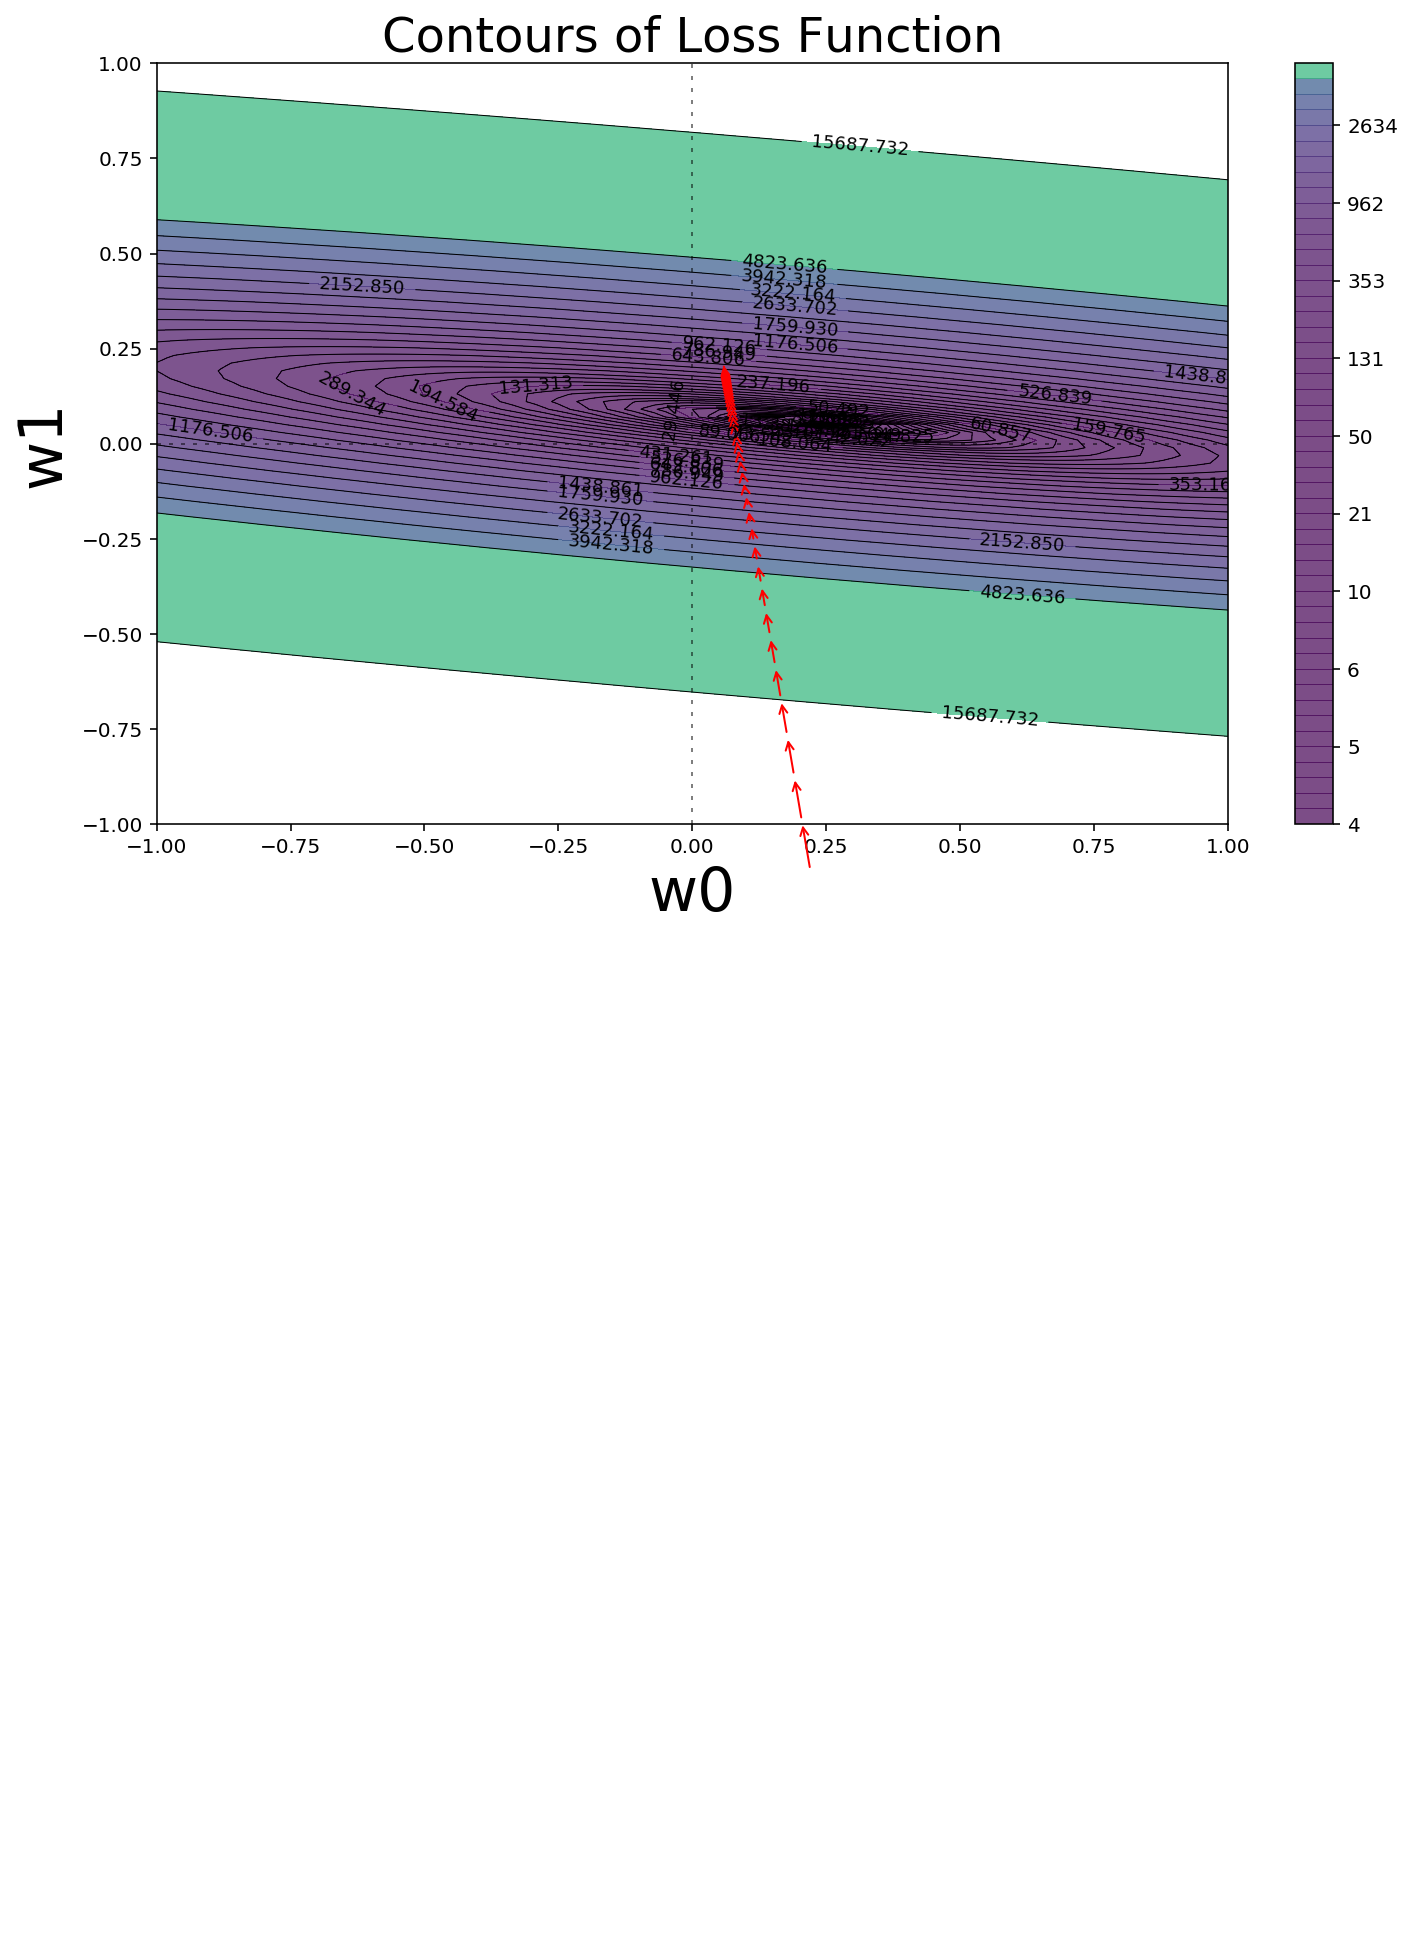

In [21]:
plot_contours(w1s_1, w0s_1, Ws_1, loss_surface_grid_1, levels_1)

## Run Gradient Descent on scaled features

In [22]:
w_init = np.array((-1, 30)) 
learning_rate = .03
tolerance = 1e-5
losses_2, Ws_2, W_2 = gradient_descent(X_scaled, y, w_init, iters=600,  lr=learning_rate, tol=tolerance)

Iteration: 0 - Loss: 55.953652646171044
Iteration: 10 - Loss: 53.46372550117196
Iteration: 20 - Loss: 51.094968657703234
Iteration: 30 - Loss: 48.84110097675289
Iteration: 40 - Loss: 46.69627528944071
Iteration: 50 - Loss: 44.65501973675619
Iteration: 60 - Loss: 42.71219273175054
Iteration: 70 - Loss: 40.8629478029538
Iteration: 80 - Loss: 39.10270563939193
Iteration: 90 - Loss: 37.42713141624108
Iteration: 100 - Loss: 35.83211602240449
Iteration: 110 - Loss: 34.31376019894656
Iteration: 120 - Loss: 32.86836087451819
Iteration: 130 - Loss: 31.492399182199733
Iteration: 140 - Loss: 30.182529784100794
Iteration: 150 - Loss: 28.935571231684317
Iteration: 160 - Loss: 27.74849716262247
Iteration: 170 - Loss: 26.61842818725621
Iteration: 180 - Loss: 25.542624355286218
Iteration: 190 - Loss: 24.518478120361788
Iteration: 200 - Loss: 23.543507739750257
Iteration: 210 - Loss: 22.615351060402205
Iteration: 220 - Loss: 21.73175965300636
Iteration: 230 - Loss: 20.89059326314402
Iteration: 240 - Lo

### Loss change over iteratiosn

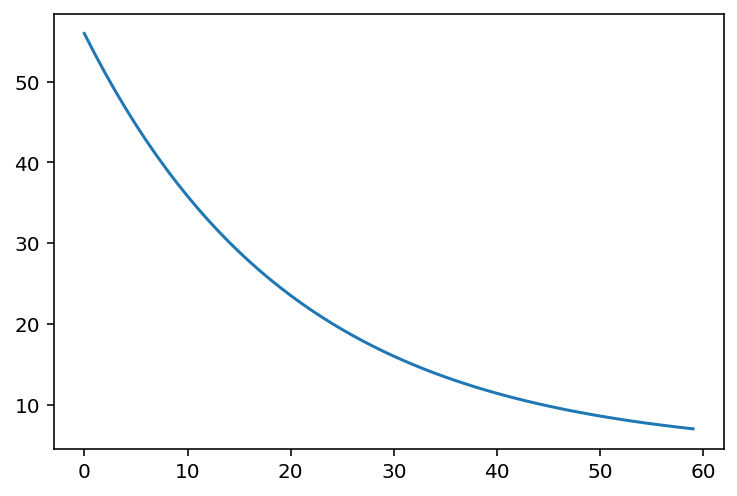

In [23]:
plt.plot(range(len(losses_2)), losses_2);

### Compare parameters to optimum

In [24]:
W_2, (w0_optimal_scaled, w1_optimal_scaled)

(array([12.2710555 , 15.86728984]), (13.529698825388273, 9.324513640367343))

In [25]:
loss_surface_grid_2, w0s_2, w1s_2, levels_2 = create_loss_surface_grid(X_scaled, y, Ws_2, losses_2, w_ranges=((-10, 30), (-10,30)))

### Now plot loss surface

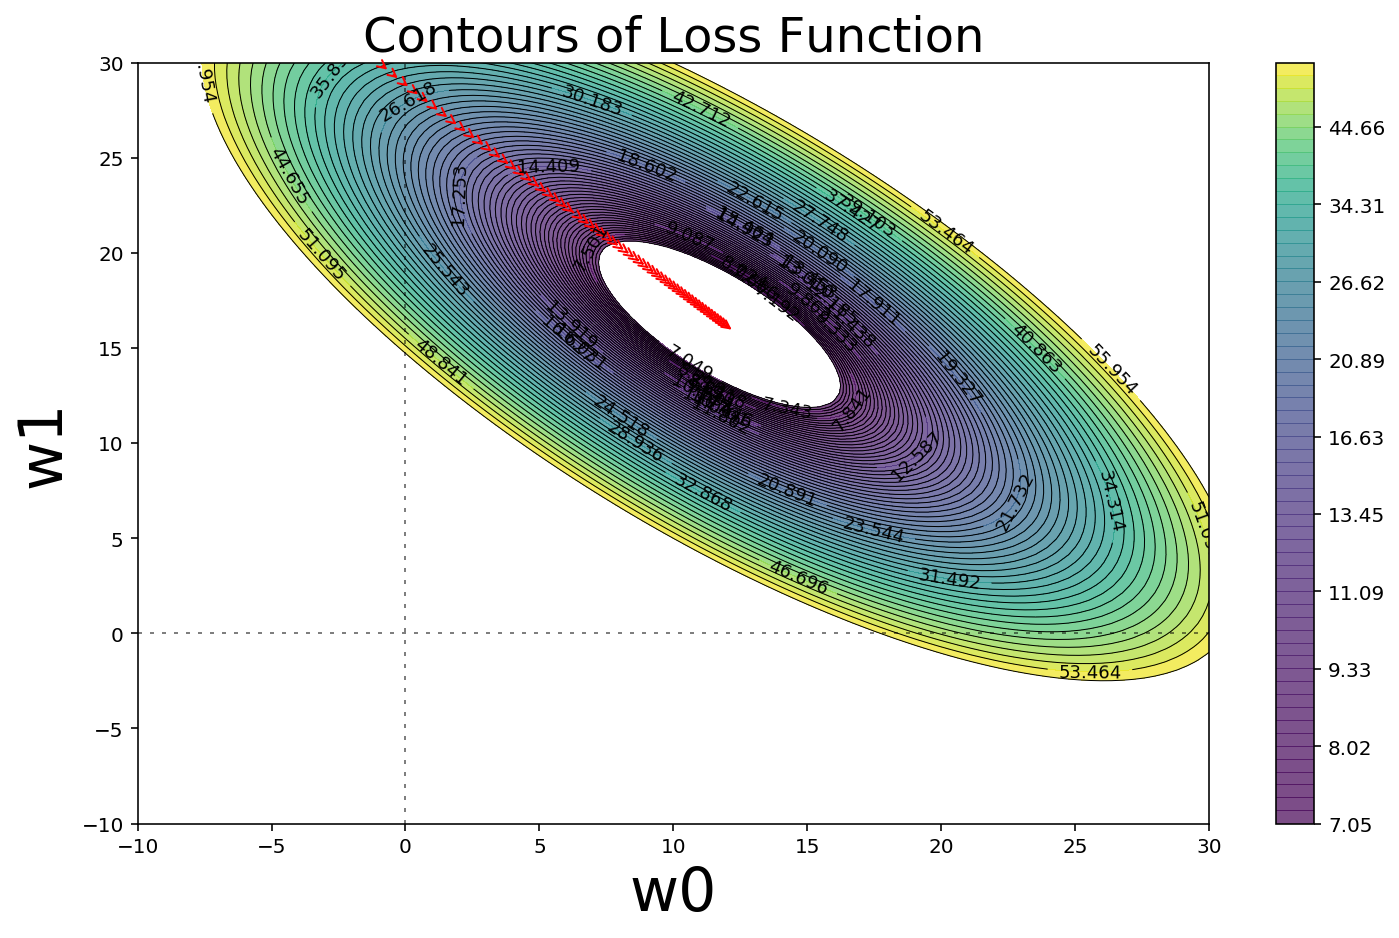

In [26]:
plot_contours(w1s_2, w0s_2, Ws_2, loss_surface_grid_2, levels_2)

# Loss Surfaces on random subsets of data

**Loss surface is depend on input data. If we take random samples from data and plot loss contours we will see differences between them. Differences will be bigger as standard deviation increases. We can check that on our original and scaled features.**

## Get Samples from original data

In [27]:
original_df = pd.concat([pd.DataFrame(X), pd.DataFrame(y)], axis=1)

In [28]:
n_samples = 4
sample_size = 10

In [29]:
data_samples_orig = [original_df.sample(sample_size) for _ in range(n_samples)]

In [30]:
ys_orig = [data.iloc[:, 2].values for data in data_samples_orig]
xs_orig = [data.iloc[:,:2].values for data in data_samples_orig]

## Plot Surface Contours for each

In [31]:
def plot_surface_contour(X, y, ws, losses, w_ranges, ):
    loss_surface_grid_, w0s_, w1s_, levels_ = create_loss_surface_grid(
        X, y, ws, losses, w_ranges=w_ranges)
    
    plot_contours(w0s_, w1s_, ws, loss_surface_grid_, levels_)

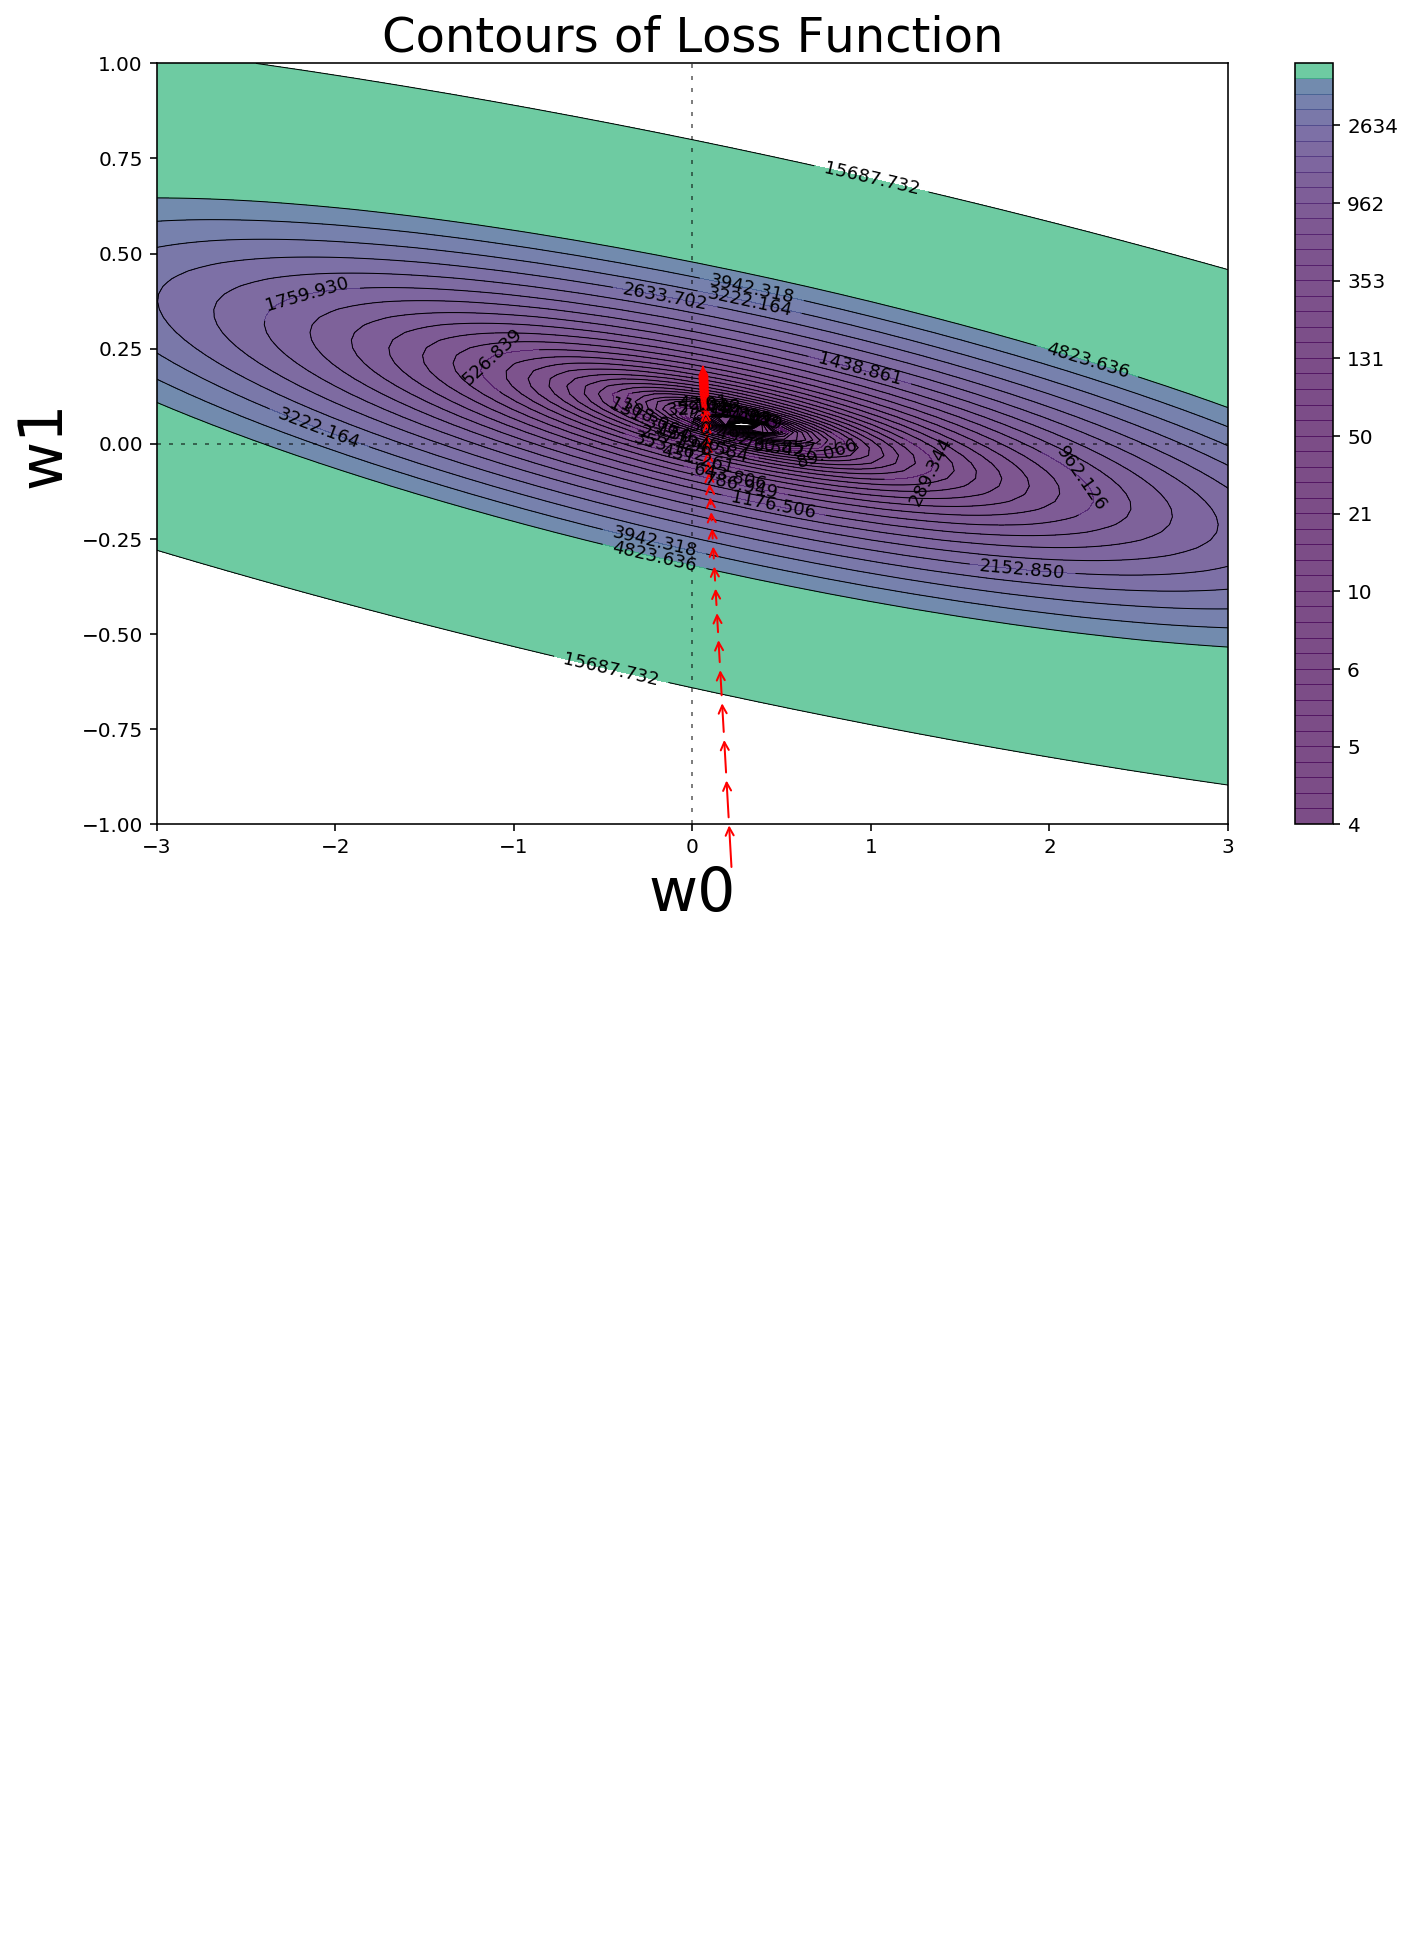

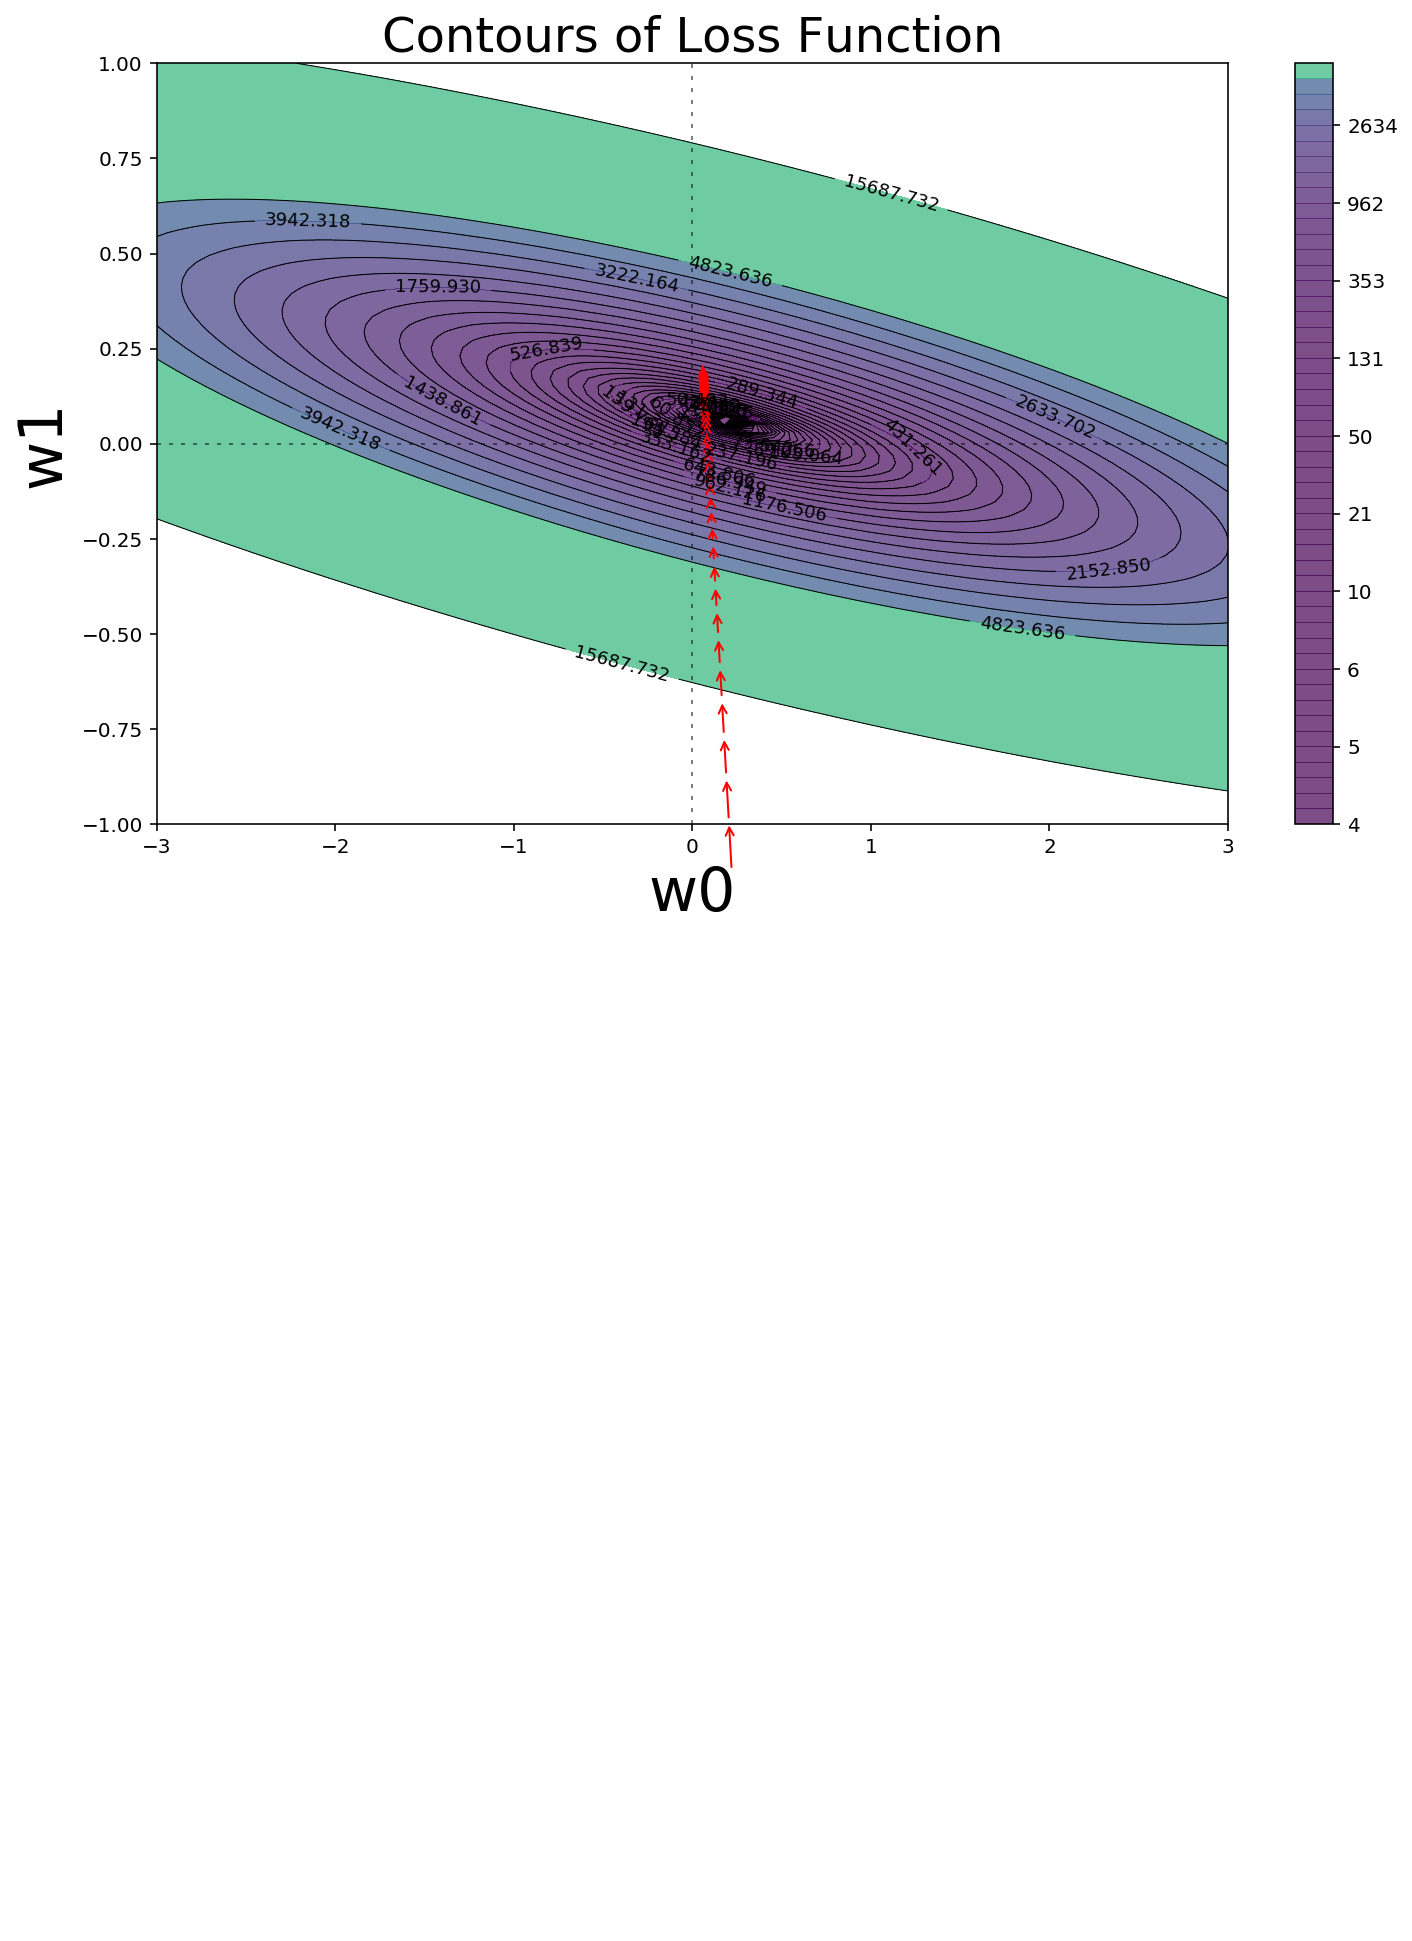

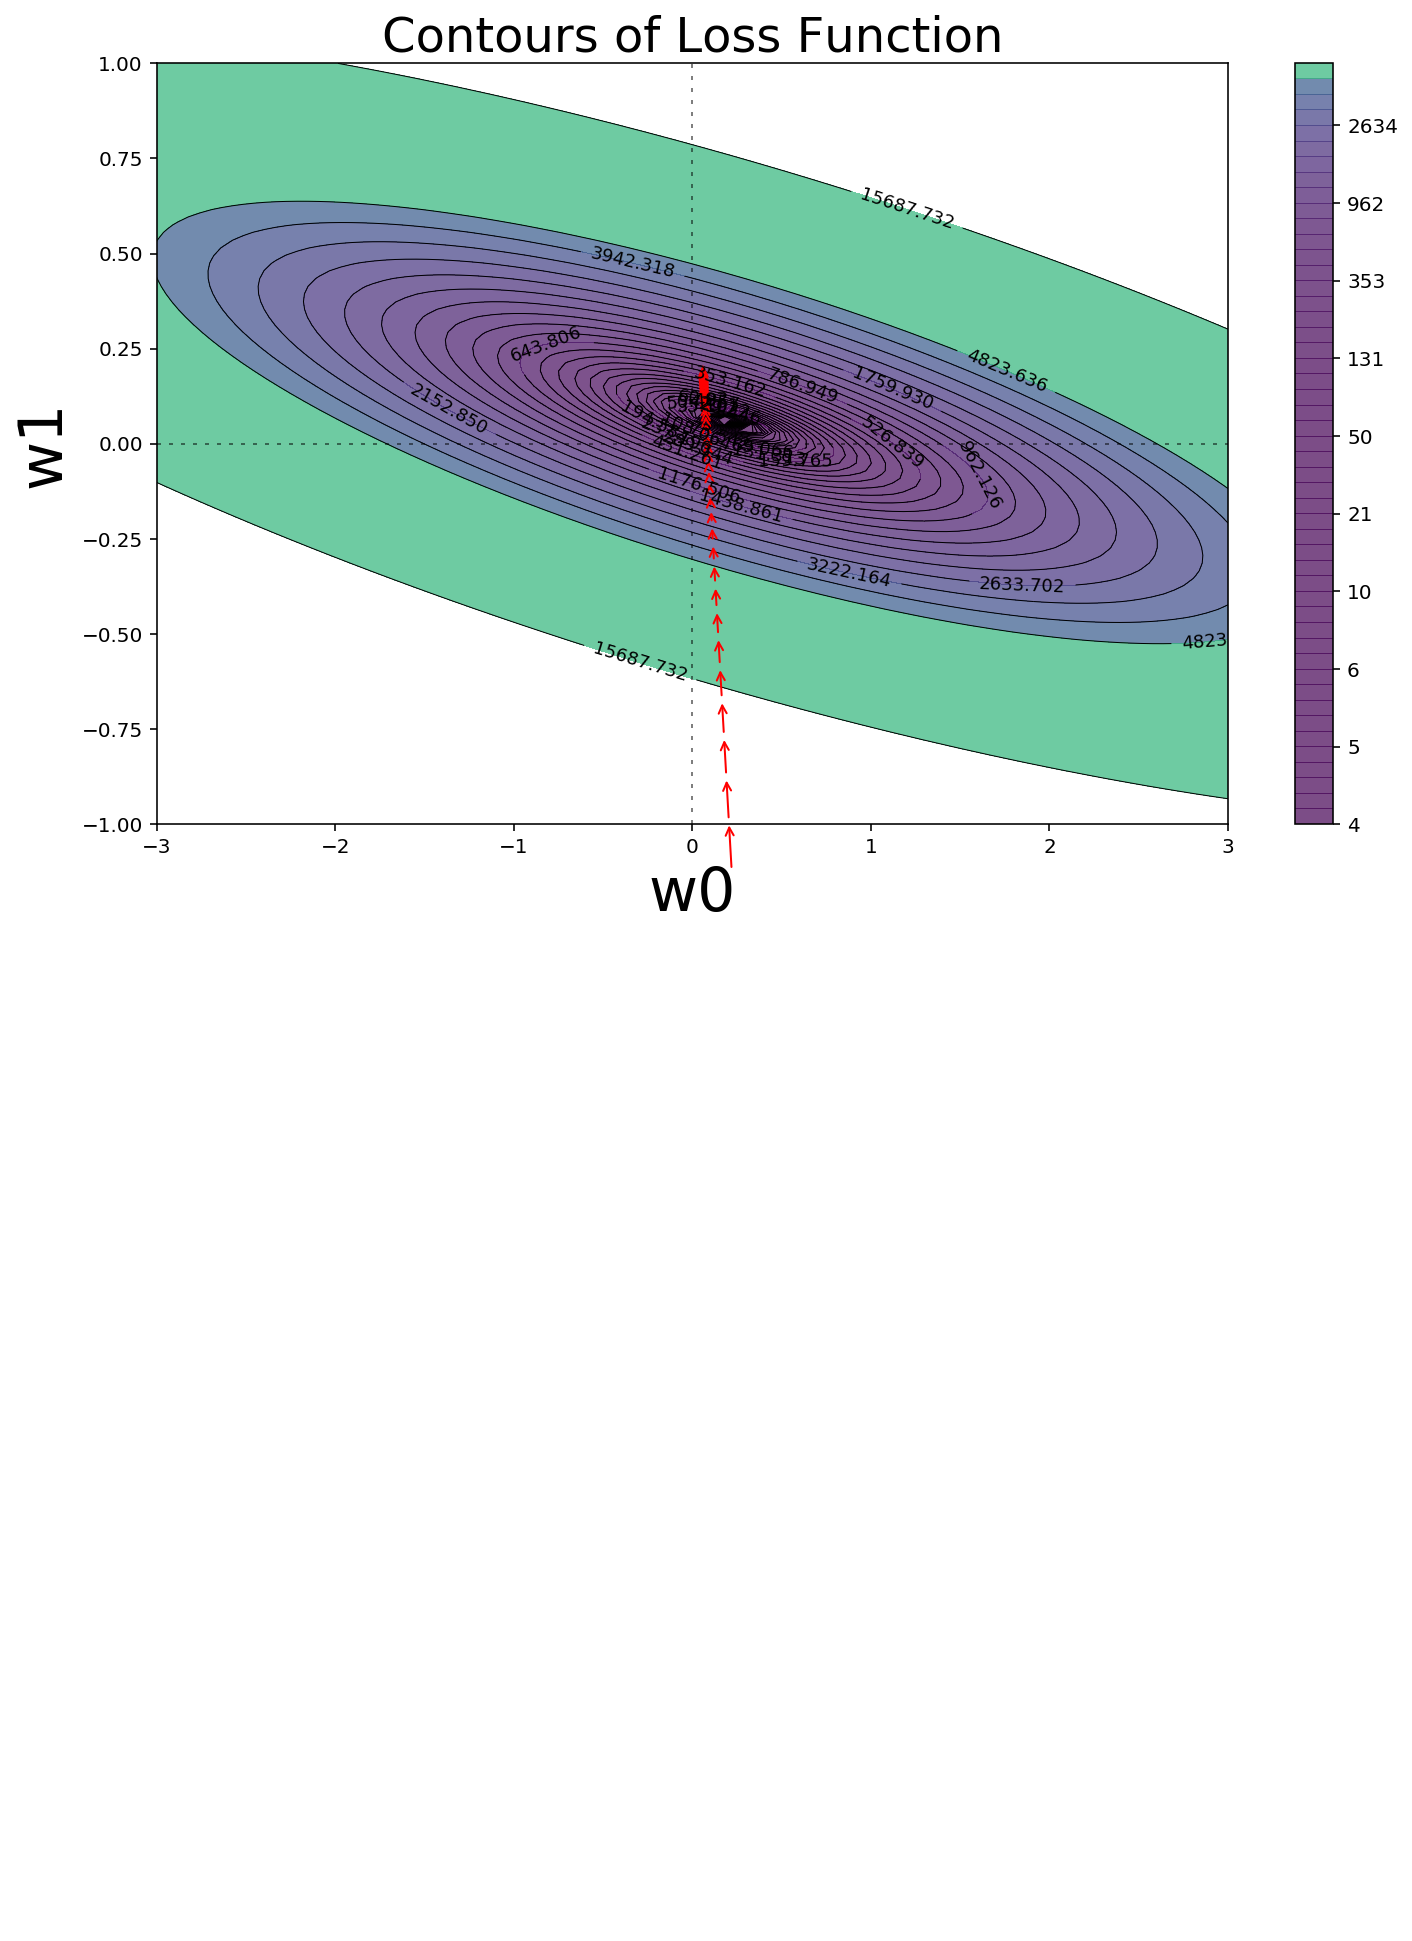

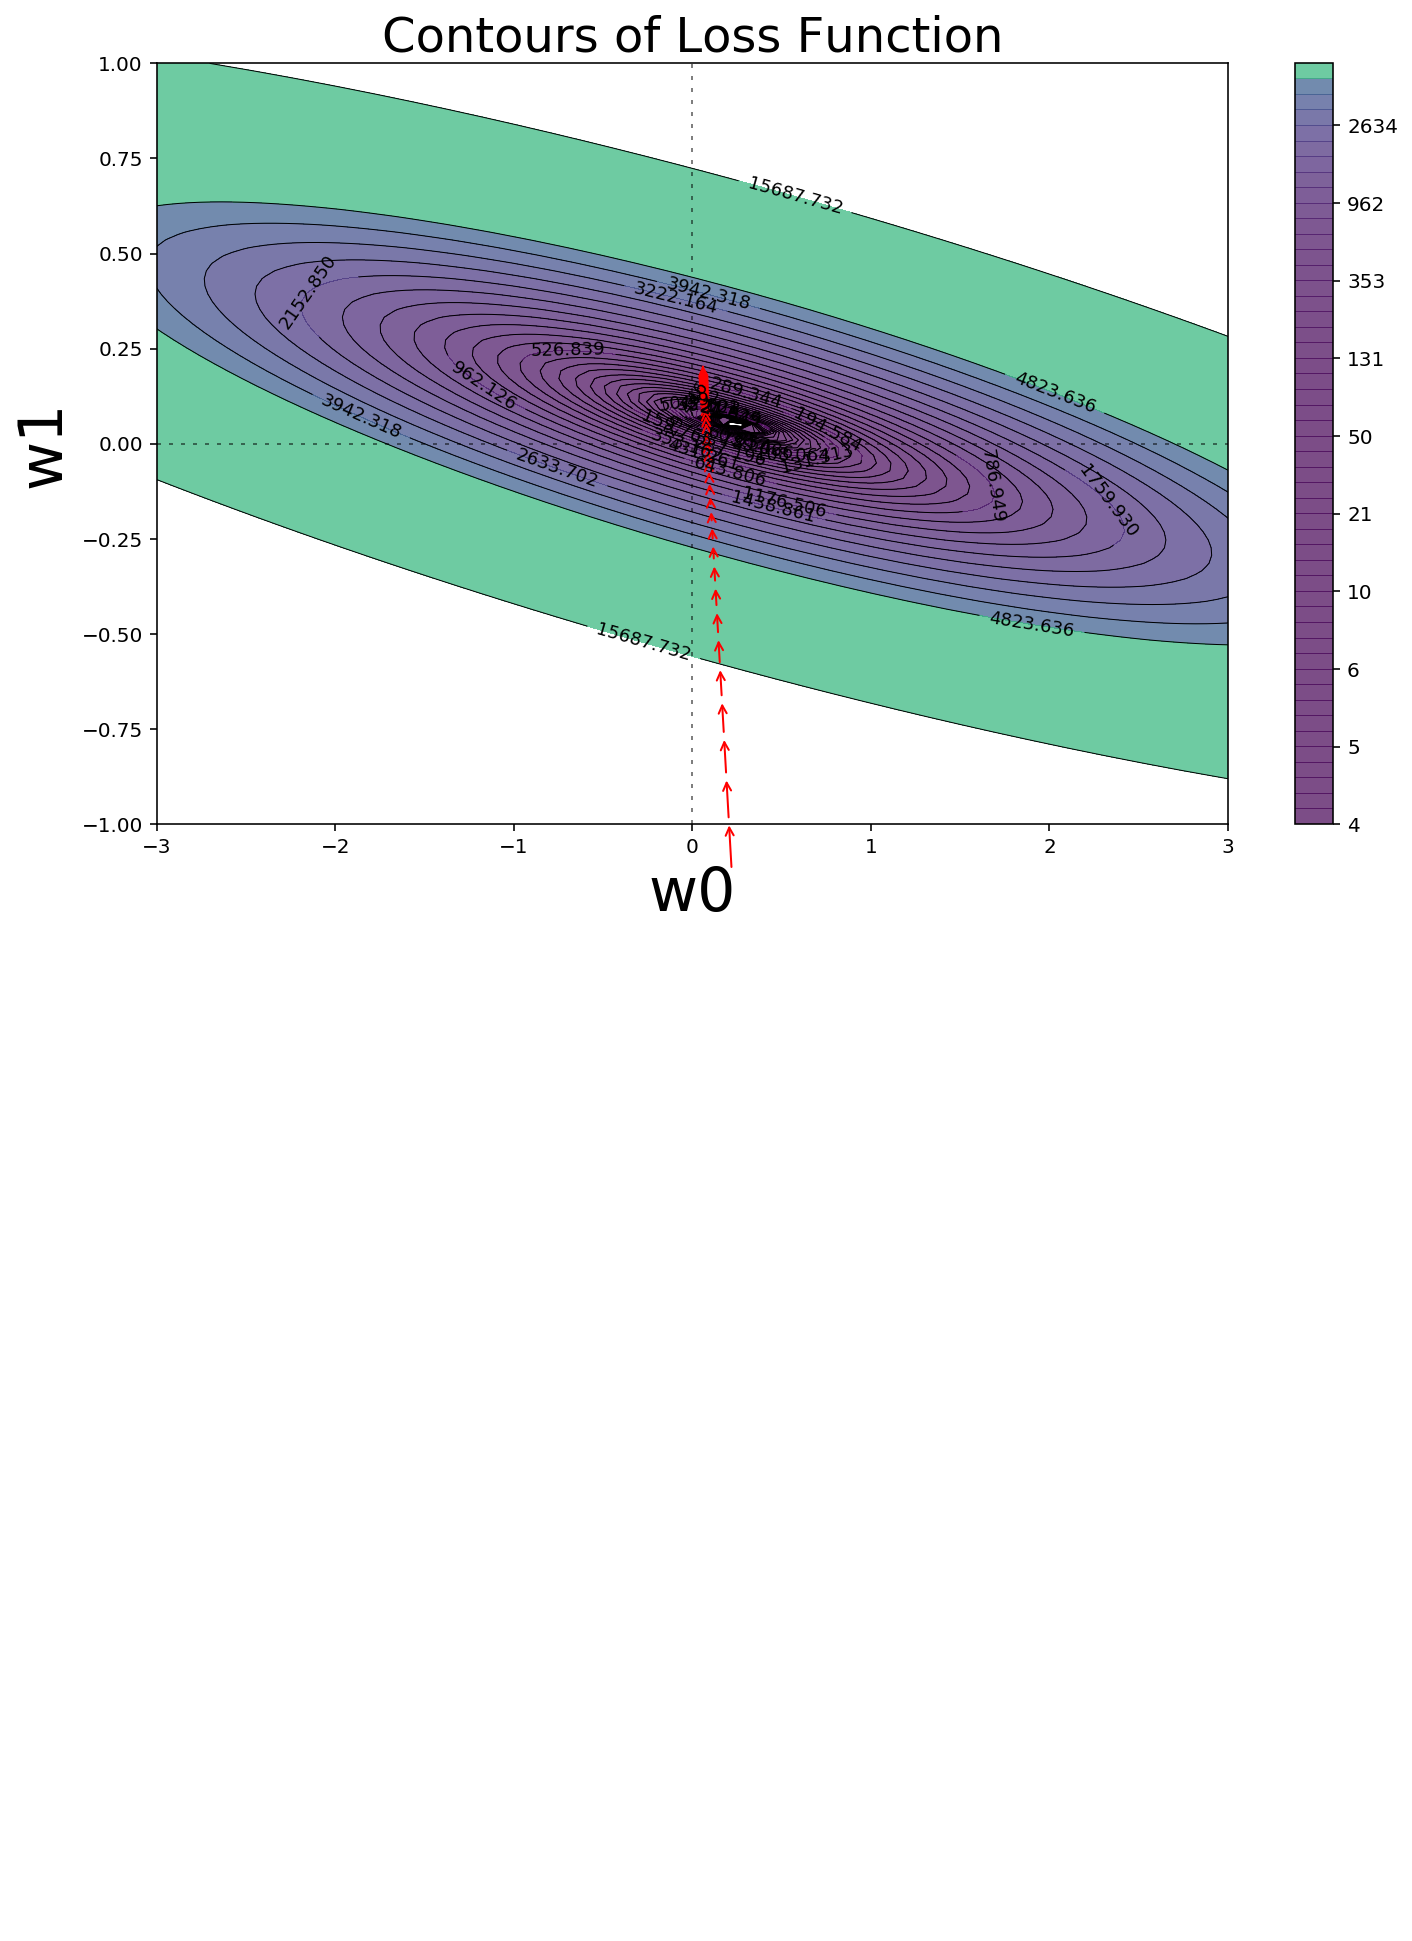

In [32]:
for x_, y_ in zip(xs_orig, ys_orig):
    loss_surface_grid_, w0s_, w1s_, levels_ = create_loss_surface_grid(
        x_, y_, Ws_1, losses_1[:], w_ranges=((-1,1),(-3,3)))
    
    plot_contours(w1s_, w0s_, Ws_1, loss_surface_grid_, levels_)

## Get Samples from scaled data

In [33]:
scaled_df = pd.concat([pd.DataFrame(X_scaled), pd.DataFrame(y)], axis=1)

In [34]:
n_samples = 4
sample_size = 10

In [35]:
data_samples_scaled = [scaled_df.sample(sample_size) for _ in range(n_samples)]

In [36]:
ys_scaled = [data.iloc[:, 2].values for data in data_samples_scaled]
xs_scaled = [data.iloc[:,:2].values for data in data_samples_scaled]

## Plot Surface Contours for each

In [37]:
def plot_surface_contour(X, y, ws, losses, w_ranges, ):
    loss_surface_grid_, w0s_, w1s_, levels_ = create_loss_surface_grid(
        X, y, ws, losses, w_ranges=w_ranges)
    
    plot_contours(w0s_, w1s_, ws, loss_surface_grid_, levels_)

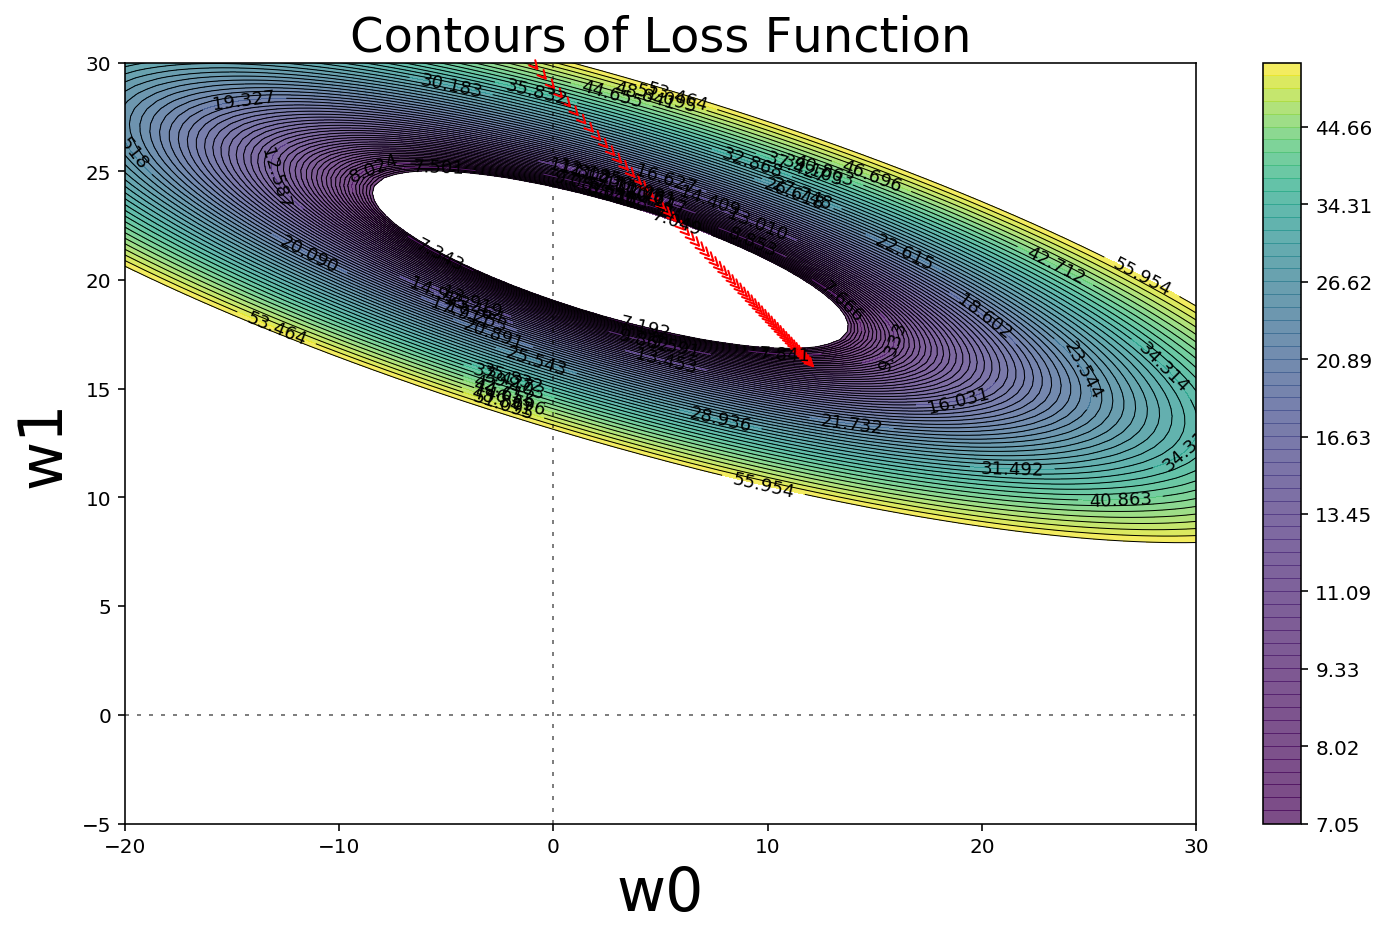

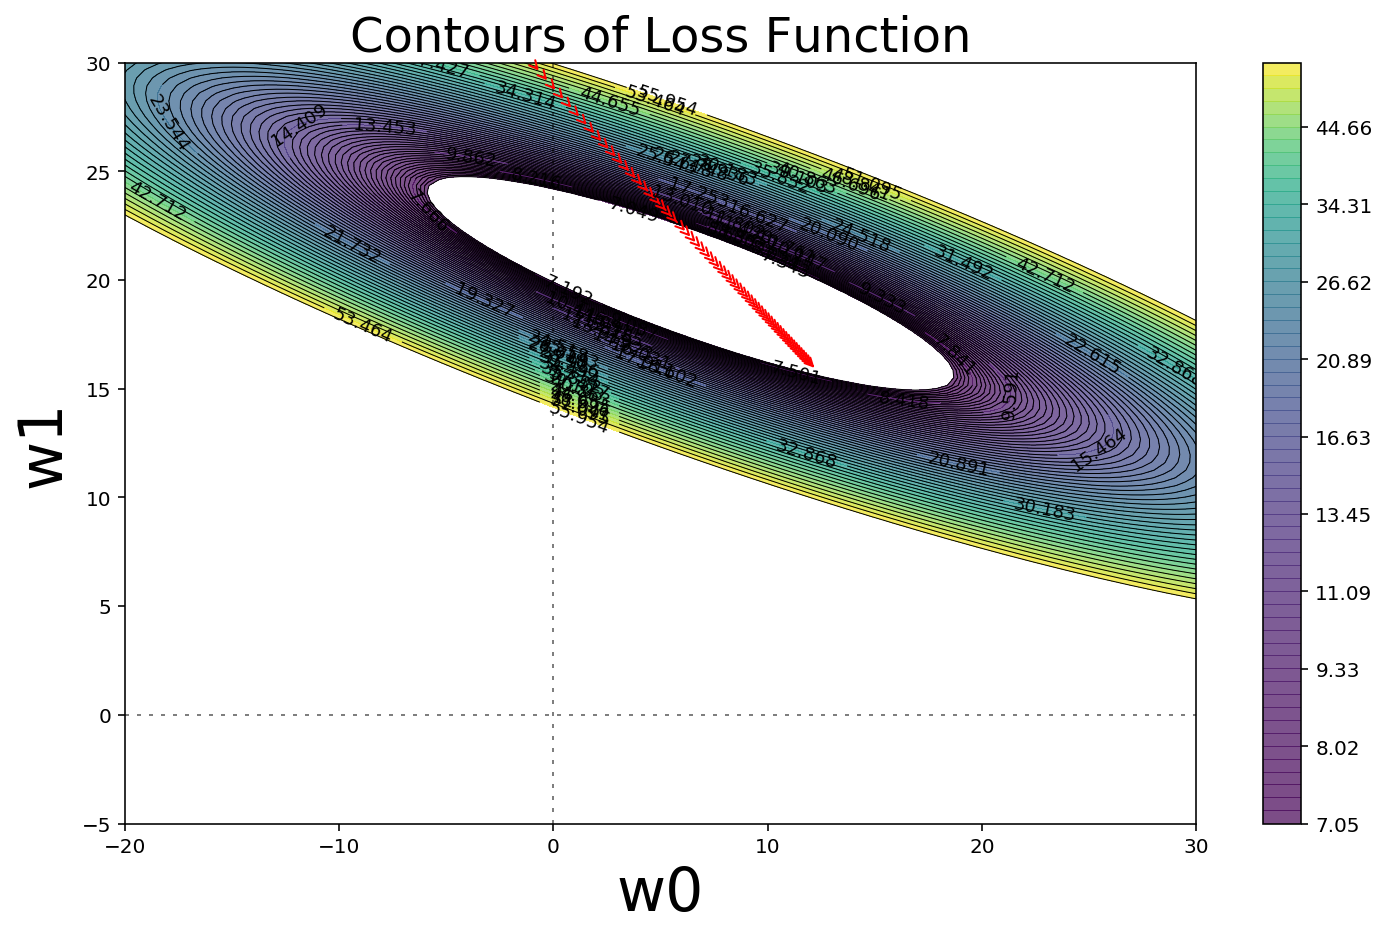

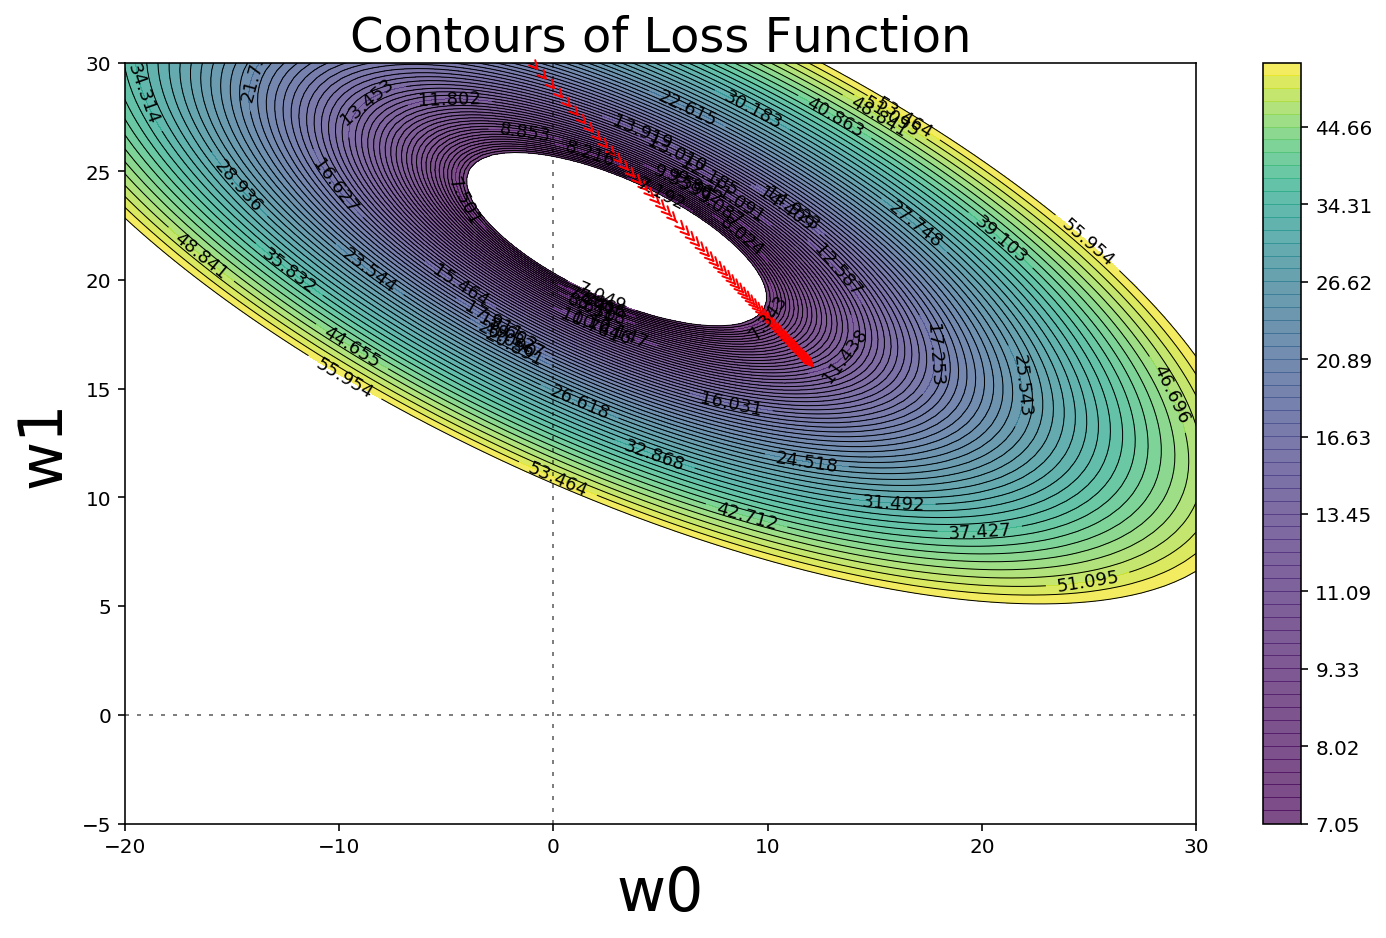

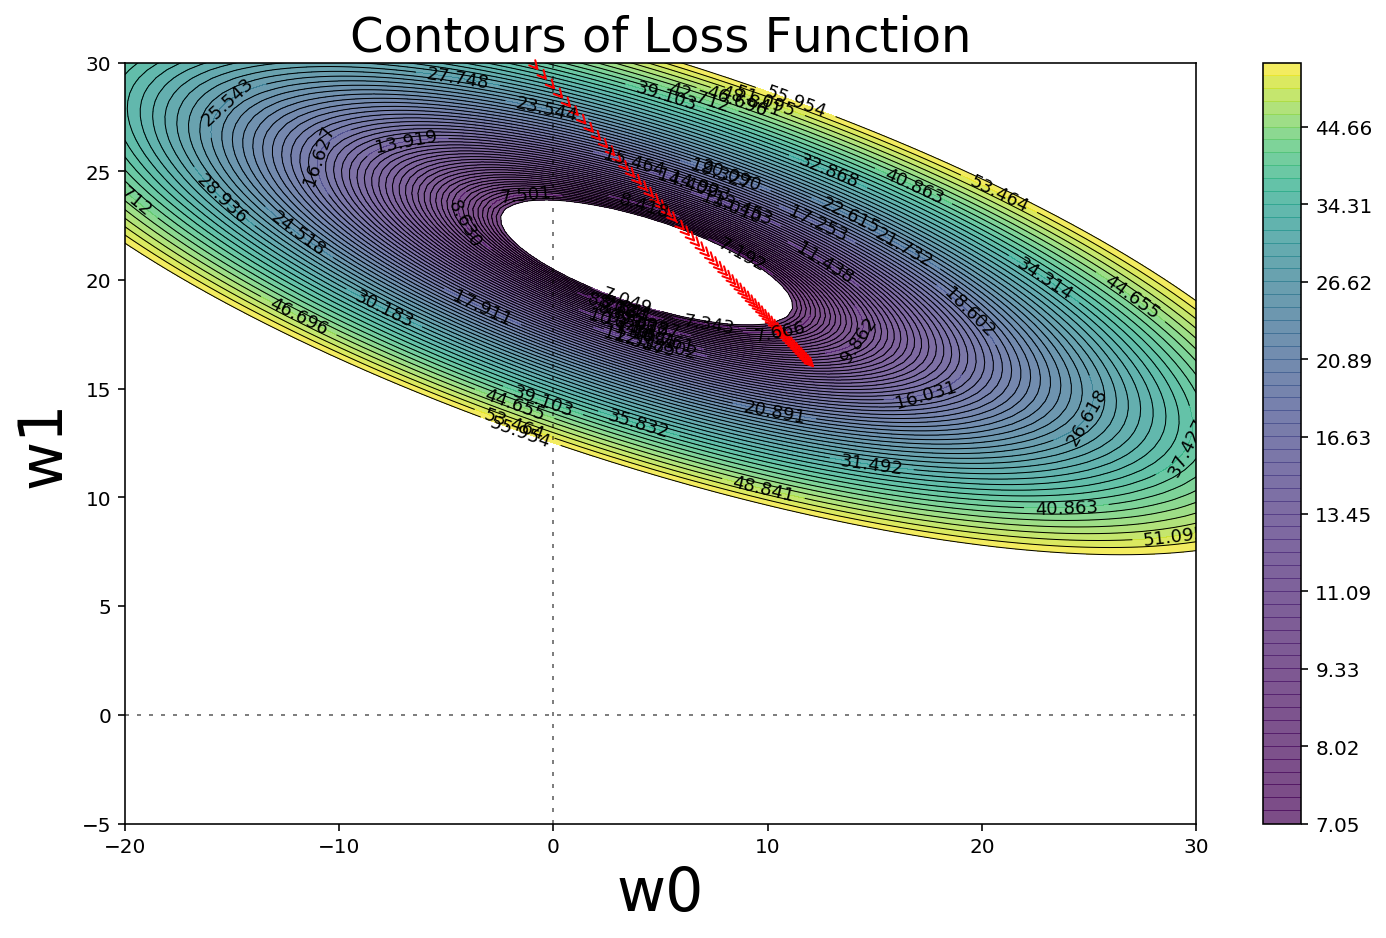

In [38]:
for x_, y_ in zip(xs_scaled, ys_scaled):
    loss_surface_grid_, w0s_, w1s_, levels_ = create_loss_surface_grid(
        x_, y_, Ws_2, losses_2, w_ranges=((-20,30),(-5,30)))
    
    plot_contours(w0s_, w1s_, Ws_2, loss_surface_grid_, levels_)